In [183]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set background colors
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black'})

# Make gridlines thinner and lighter
plt.rc('grid', linewidth=0.2, color='lightgray')

# Set text color to white (axes labels, tick labels, and titles)
plt.rc('axes', labelcolor='white', titlesize=16, titleweight='bold', titlecolor='white')
plt.rc('xtick', color='white')
plt.rc('ytick', color='white')
plt.rc('legend', facecolor='black', edgecolor='white')

#setting the matplotlib theme
# plt.style.use('seaborn-v0_8-dark')

## PART - 1

### Initial Dataset overview

- Load the dataset and display the first few rows to get an initial look at the data.

- Categorize the Variables: Identify the name and type (continuous or categorical) for each variable in the dataset.
    
    - List the number of unique values for each variable. This will help you determine whether a variable should be treated as categorical or continuous.

- Provide a brief summary of the dataset’s structure and variable types.


In [184]:
#load the dataset
df = pd.read_csv('./data/titanic.csv')

#display the first few rows as table 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [185]:
#categorize the variables
print("Information about the dataset:")
print("---"*20)
df.info()

#list the number of unique values for each variable
print("\n\nNo of Unique Values for each variable:")
print("---"*20)
df.nunique()


Information about the dataset:
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


No of Unique Values for each variable:
------------------------------------------------------------


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [186]:
# print the column names
print(f"Column names: {df.columns}\n\n")

#provide a brief summary of the dataset's structure and variable types
print("Summary of the dataset:")
print("---"*20)
df.describe()

Column names: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Summary of the dataset:
------------------------------------------------------------


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## PART - 2

### Univariate Analysis

- Conduct univariate EDA on all variables. For each variable:

- Descriptive Statistics:
    
    - For continuous variables, provide summary statistics (mean, median, standard deviation, etc.).
    - For categorical variables, provide frequency counts of unique values.

- Visualizations:

    - Use histograms or box plots for continuous variables.
    - Use bar plots or count plots for categorical variables.

- Interpretation:

    - Interpret the descriptive statistics and visualizations:
        - What do you observe in terms of distribution, central tendency, or spread?
        - Identify any potential issues, such as outliers, missing values, or skewness.

In [187]:
# continous and categorical variables
continuous_vars = ['Age', 'Fare']
categorical_vars = ['Survived', 'Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']

print(f"Continuous variables: {continuous_vars}")
print(f"Categorical variables: {categorical_vars}")


Continuous variables: ['Age', 'Fare']
Categorical variables: ['Survived', 'Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']


### Descriptive Statistics

In [188]:
# descriptive statistics for continuous variables
df[continuous_vars].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [189]:
# frequency counts for categorical variables excluding the name column
df[categorical_vars].value_counts()

Survived  Pclass  Sex     Embarked  SibSp  Parch
0         3       male    S         0      0        177
          2       male    S         0      0         61
          1       male    S         0      0         35
          3       male    C         0      0         28
                          Q         0      0         27
                                                   ... 
                  female  S         1      6          1
                                           5          1
                                           4          1
                                           3          1
1         3       male    S         4      2          1
Name: count, Length: 160, dtype: int64

### Visualitzations

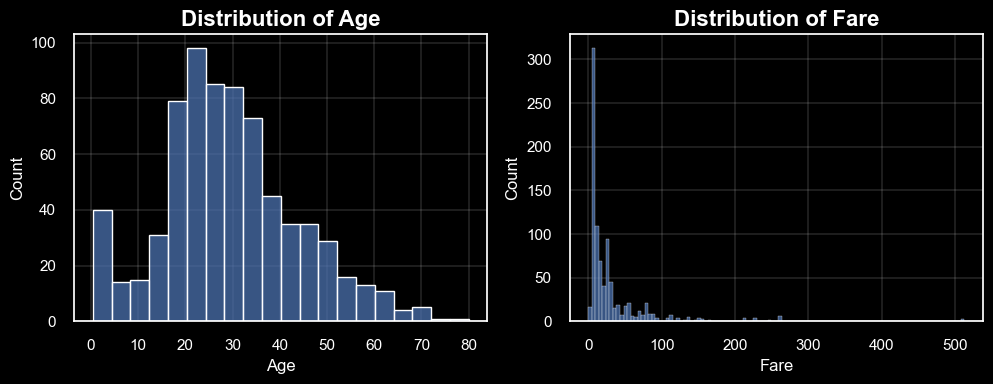

              Age        Fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200


In [190]:
# visualizations for continuous variables

n = len(continuous_vars)
n_cols = 4
n_rows = (n + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(continuous_vars):
    sns.histplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print(df[continuous_vars].describe())

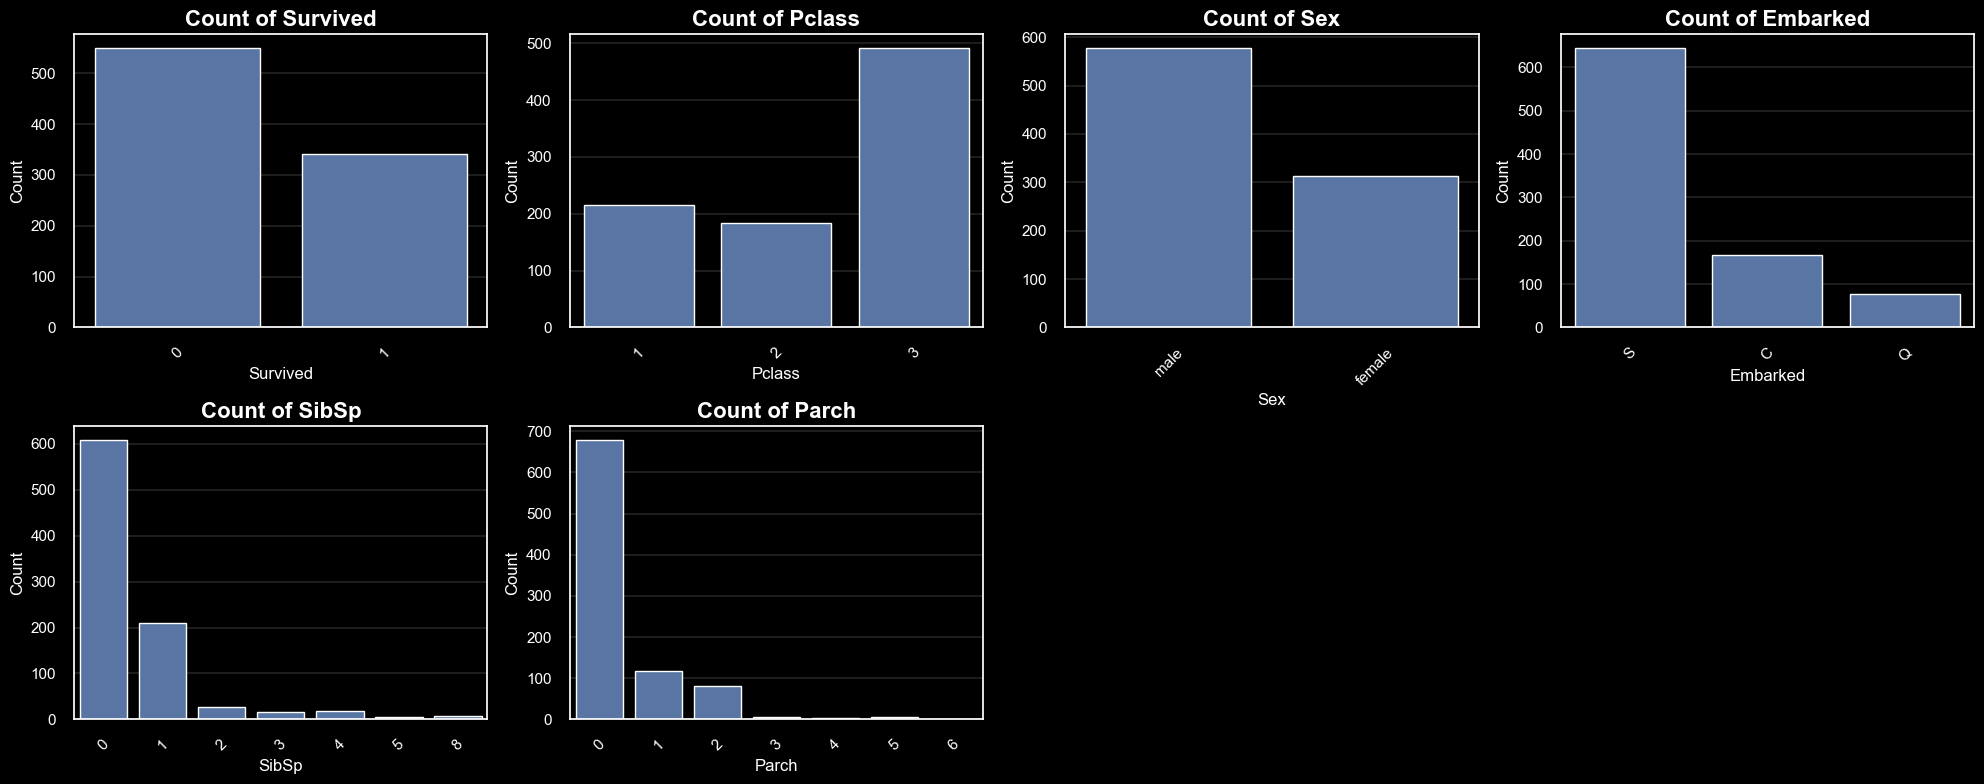

         Survived      Pclass       SibSp       Parch
count  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642    0.523008    0.381594
std      0.486592    0.836071    1.102743    0.806057
min      0.000000    1.000000    0.000000    0.000000
25%      0.000000    2.000000    0.000000    0.000000
50%      0.000000    3.000000    0.000000    0.000000
75%      1.000000    3.000000    1.000000    0.000000
max      1.000000    3.000000    8.000000    6.000000


In [191]:
# bar plots for categorical variables

n = len(categorical_vars)
n_cols = 4
n_rows = (n + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_vars):
    
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', labelrotation=45)

    if col == 'Name' or col == 'Ticket' or col == 'Cabin':
        continue
    sns.countplot(data=df, x=col, ax=axes[i])
    
# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print(df[categorical_vars].describe())

## Interpretation of Descriptive Statistics and Visualizations

### Continuous Variables

- **Age**
  - Some age values are missing.
  - The distribution is **right-skewed** (more young passengers, fewer older).
  - Potential outliers present at very young and very old ages.

- **Fare**
  - The distribution is **strongly right-skewed**.
  - Most fares are low, but a few outliers exist with values exceeding 500.
  - Indicates most passengers paid low fares, but some paid much higher prices.

---

### Categorical Variables

- **Survived**
  - Binary distribution with more 0s (did not survive) than 1s.
  - No missing values.

- **Pclass**
  - **Left-skewed**: the majority of passengers were in 3rd class.

- **SibSp**
  - **Right-skewed**: most passengers have 0 siblings/spouses aboard; few have higher numbers.

- **Parch**
  - **Right-skewed**: most passengers have 0 parents/children aboard; higher values are rare.

- **Embarked**
  - Most passengers embarked from port 'S'.
  - A small number of missing values.

- **Sex**
  - Categorical with two categories (male, female).
  - No skewness or missing values.

# Part - 3

## Bivariate Analysis

- Explore relationships between pairs of variables. Choose at least four pairs of variables that you find interesting and perform bivariate analysis:
    
    - At least two pairs should involve a continuous variable and a categorical variable (e.g., Age vs Survived, Fare vs Pclass).
    - At least two pairs should involve categorical variables (e.g., Sex vs Survived, Pclass vs Survived).


- For each pair:
    
    - **Visualizations:**
        
        - Use appropriate visualizations such as box plots, bar plots, scatter plots, or violin plots.

    - **Descriptive Statistics:**
        
        - Use groupby or pivot tables to explore relationships between the variables.

    - **Interpretation:**

        - What do you observe in terms of relationships between variables? Are there any trends or patterns?

        - Mention any potential data issues that might affect the relationships (e.g., outliers, missing values, or non-normal distributions).

---

**Fare vs Embarked**  
  - Exploring how ticket prices differ by port of embarkation, does location affect what people paid?

**Age vs Sex**
  - Comparing the age distribution between males and females, are there more young or old in each gender?

**Survived vs Pclass**
  - Analyzing how passenger class is related to survival rate?

**Survived vs Embarked**
  - Investigating which boarding location was associated with a higher survival rate—did some regions have more survivors?

**Survived vs SibSp**
  - Examining whether traveling alone or with family/spouse affected survival ?


In [192]:
### 1. Fare vs Embarked (Continuous vs Categorical)

# Descriptive Statistics
print("Fare by Embarked Port - Descriptive Statistics:")
print("=" * 50)
fare_by_embarked = df.groupby('Embarked')['Fare'].describe()
print(fare_by_embarked)

print("\n\nMean Fare by Embarked Port:")
print("-" * 30)
mean_fare_by_embarked = df.groupby('Embarked')['Fare'].mean().sort_values(ascending=False)
print(mean_fare_by_embarked)


Fare by Embarked Port - Descriptive Statistics:
          count       mean        std     min       25%    50%        75%  \
Embarked                                                                    
C         168.0  59.954144  83.912994  4.0125  13.69795  29.70  78.500025   
Q          77.0  13.276030  14.188047  6.7500   7.75000   7.75  15.500000   
S         644.0  27.079812  35.887993  0.0000   8.05000  13.00  27.900000   

               max  
Embarked            
C         512.3292  
Q          90.0000  
S         263.0000  


Mean Fare by Embarked Port:
------------------------------
Embarked
C    59.954144
S    27.079812
Q    13.276030
Name: Fare, dtype: float64


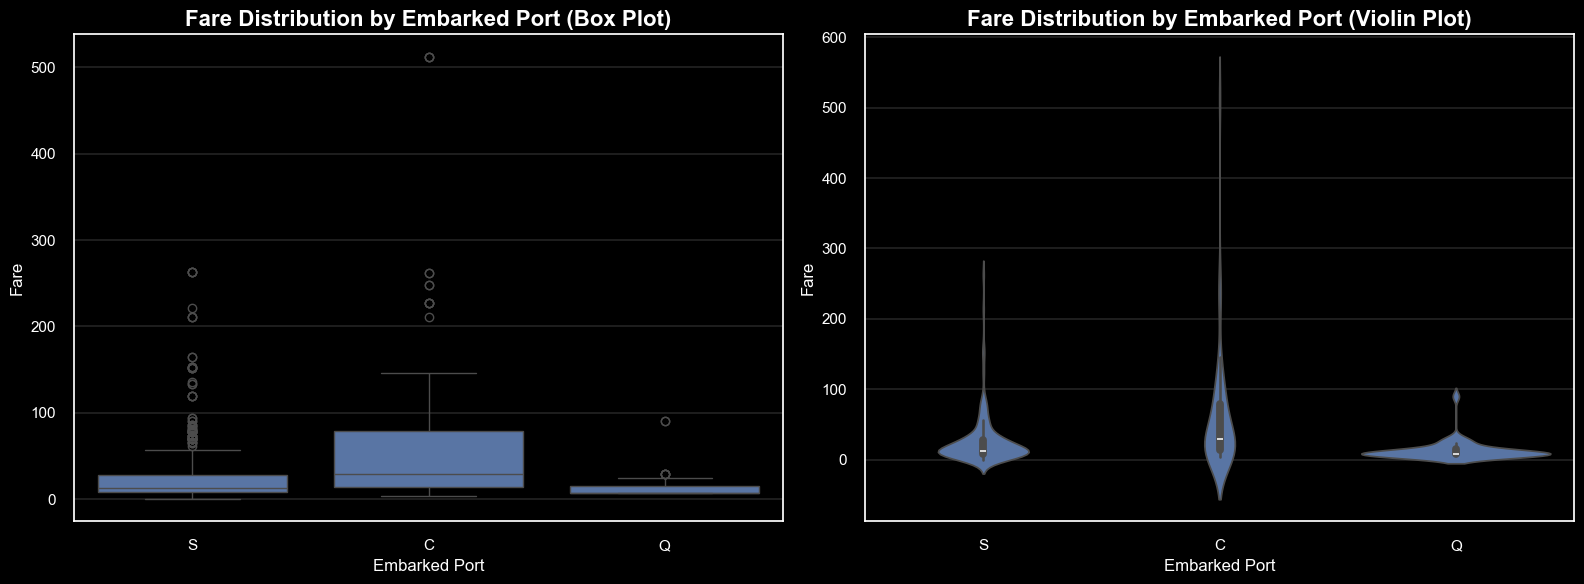

In [193]:
# Visualizations for Fare vs Embarked
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot
sns.boxplot(data=df, x='Embarked', y='Fare', ax=axes[0])
axes[0].set_title('Fare Distribution by Embarked Port (Box Plot)')
axes[0].set_xlabel('Embarked Port')
axes[0].set_ylabel('Fare')

# Violin plot
sns.violinplot(data=df, x='Embarked', y='Fare', ax=axes[1])
axes[1].set_title('Fare Distribution by Embarked Port (Violin Plot)')
axes[1].set_xlabel('Embarked Port')
axes[1].set_ylabel('Fare')

plt.tight_layout()
plt.show()


**Interpretation - Fare vs Embarked:**

- **Port C (Cherbourg)** has the highest mean fare (~$59.95), indicating passengers from this port paid significantly more.
- **Port S (Southampton)** has the lowest mean fare (~$27.08), suggesting more budget-conscious passengers or different ticket pricing.
- **Port Q (Queenstown)** falls in between with moderate fares (~$13.28).
- The box plots reveal **significant outliers** in all ports, with some passengers paying extremely high fares.
- Port C shows the **widest fare distribution**, suggesting a mix of luxury and standard passengers.
- This pattern might reflect the **socioeconomic status** of passengers boarding from different locations or different pricing strategies by port.


In [194]:
### 2. Age vs Sex (Continuous vs Categorical)

# Descriptive Statistics
print("Age by Sex - Descriptive Statistics:")
print("=" * 40)
age_by_sex = df.groupby('Sex')['Age'].describe()
print(age_by_sex)

print("\n\nMean Age by Sex:")
print("-" * 20)
mean_age_by_sex = df.groupby('Sex')['Age'].mean()
print(mean_age_by_sex)


Age by Sex - Descriptive Statistics:
        count       mean        std   min   25%   50%   75%   max
Sex                                                              
female  261.0  27.915709  14.110146  0.75  18.0  27.0  37.0  63.0
male    453.0  30.726645  14.678201  0.42  21.0  29.0  39.0  80.0


Mean Age by Sex:
--------------------
Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64


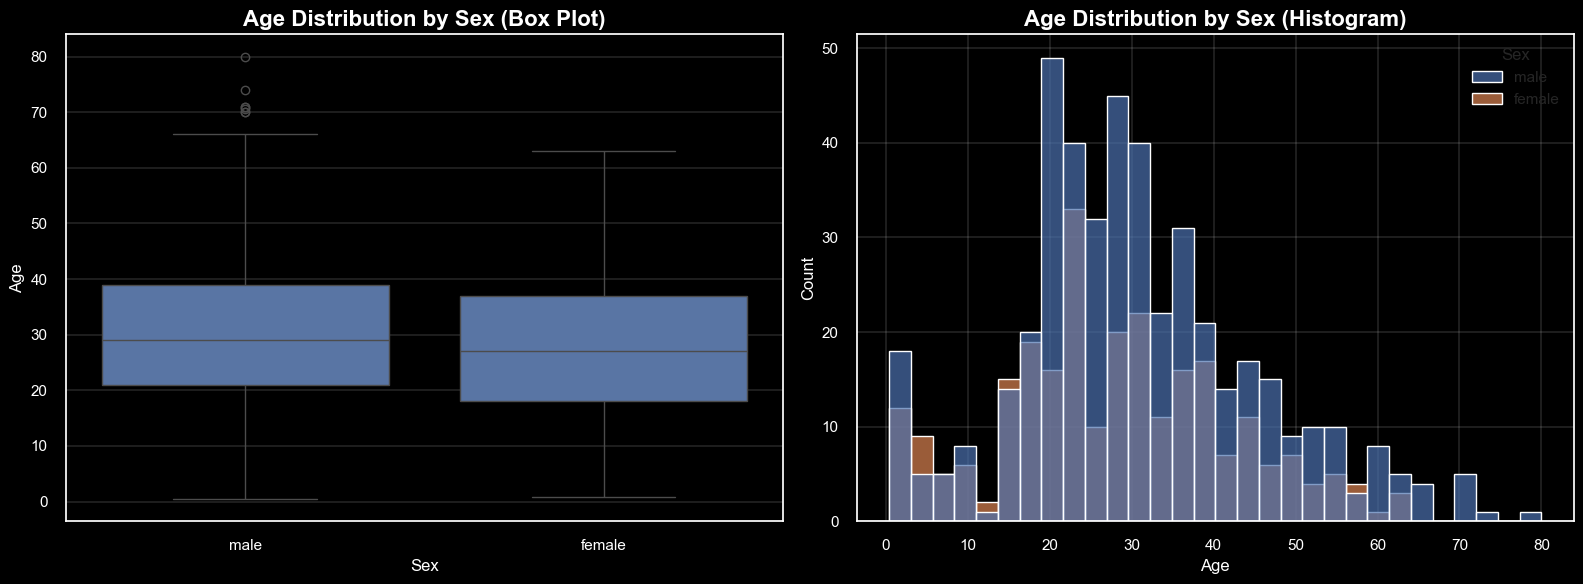

In [195]:
# Visualizations for Age vs Sex
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot
sns.boxplot(data=df, x='Sex', y='Age', ax=axes[0])
axes[0].set_title('Age Distribution by Sex (Box Plot)')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Age')

# Histogram with overlay
sns.histplot(data=df, x='Age', hue='Sex', alpha=0.7, bins=30, ax=axes[1])
axes[1].set_title('Age Distribution by Sex (Histogram)')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


**Interpretation - Age vs Sex:**

- **Males** have a slightly higher mean age (~30) compared to **females** (~27).
- Both genders show similar **age distributions**, with most passengers in the 20-40 age range.
- The **interquartile ranges** are comparable, indicating similar age spreads for both sexes.
- Both distributions are **right-skewed**, with more young passengers than elderly ones.
- There are **outliers** in both groups, particularly very young children and elderly passengers.
- The histogram shows that **males** outnumber **females** in most age groups, consistent with the overall gender distribution in the dataset.
- No significant age-based gender bias is observed, suggesting passengers of both sexes traveled across all age groups.


In [196]:
### 3. Survived vs Pclass (Categorical vs Categorical)

# Descriptive Statistics
print("Survival Rate by Passenger Class:")
print("=" * 35)
survival_by_pclass = df.groupby('Pclass')['Survived'].agg(['count', 'sum', 'mean'])
survival_by_pclass.columns = ['Total_Passengers', 'Survivors', 'Survival_Rate']
print(survival_by_pclass)

print("\n\nCrosstab - Survived vs Pclass:")
print("-" * 30)
crosstab_survived_pclass = pd.crosstab(df['Pclass'], df['Survived'], margins=True)
print(crosstab_survived_pclass)


Survival Rate by Passenger Class:
        Total_Passengers  Survivors  Survival_Rate
Pclass                                            
1                    216        136       0.629630
2                    184         87       0.472826
3                    491        119       0.242363


Crosstab - Survived vs Pclass:
------------------------------
Survived    0    1  All
Pclass                 
1          80  136  216
2          97   87  184
3         372  119  491
All       549  342  891


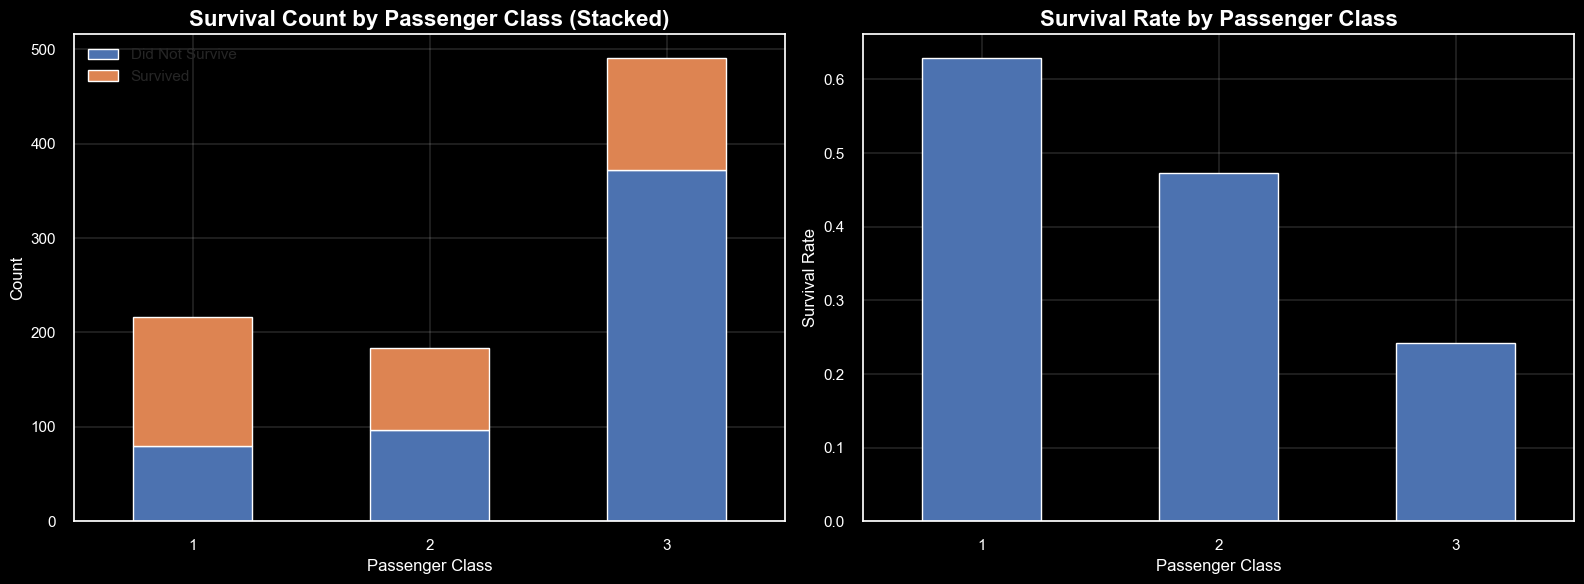

In [197]:
# Visualizations for Survived vs Pclass
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Stacked bar plot
survival_counts = df.groupby(['Pclass', 'Survived']).size().unstack()
survival_counts.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Survival Count by Passenger Class (Stacked)')
axes[0].set_xlabel('Passenger Class')
axes[0].set_ylabel('Count')
axes[0].legend(['Did Not Survive', 'Survived'])
axes[0].tick_params(axis='x', rotation=0)

# Survival rate bar plot
survival_rate = df.groupby('Pclass')['Survived'].mean()
survival_rate.plot(kind='bar', ax=axes[1])
axes[1].set_title('Survival Rate by Passenger Class')
axes[1].set_xlabel('Passenger Class')
axes[1].set_ylabel('Survival Rate')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


**Interpretation - Survived vs Pclass:**

- **Clear class-based survival pattern**: Higher class passengers had significantly better survival rates.
- **1st Class** passengers had the highest survival rate (~63%), indicating privilege and better access to lifeboats.
- **2nd Class** passengers had moderate survival rate (~47%), falling between first and third class.
- **3rd Class** passengers had the lowest survival rate (~24%), suggesting they faced greater challenges during evacuation.
- The **stacked bar chart** shows that while 3rd class had the most passengers, they also had the highest number of deaths.
- This pattern reflects the **"women and children first"** policy and **socioeconomic advantages** of upper-class passengers.
- The data suggests **systematic inequality** in survival chances based on passenger class during the disaster.


In [198]:
### 4. Survived vs Embarked (Categorical vs Categorical)

# Descriptive Statistics
print("Survival Rate by Embarked Port:")
print("=" * 30)
survival_by_embarked = df.groupby('Embarked')['Survived'].agg(['count', 'sum', 'mean'])
survival_by_embarked.columns = ['Total_Passengers', 'Survivors', 'Survival_Rate']
print(survival_by_embarked)

print("\n\nCrosstab - Survived vs Embarked:")
print("-" * 30)
crosstab_survived_embarked = pd.crosstab(df['Embarked'], df['Survived'], margins=True)
print(crosstab_survived_embarked)


Survival Rate by Embarked Port:
          Total_Passengers  Survivors  Survival_Rate
Embarked                                            
C                      168         93       0.553571
Q                       77         30       0.389610
S                      644        217       0.336957


Crosstab - Survived vs Embarked:
------------------------------
Survived    0    1  All
Embarked               
C          75   93  168
Q          47   30   77
S         427  217  644
All       549  340  889


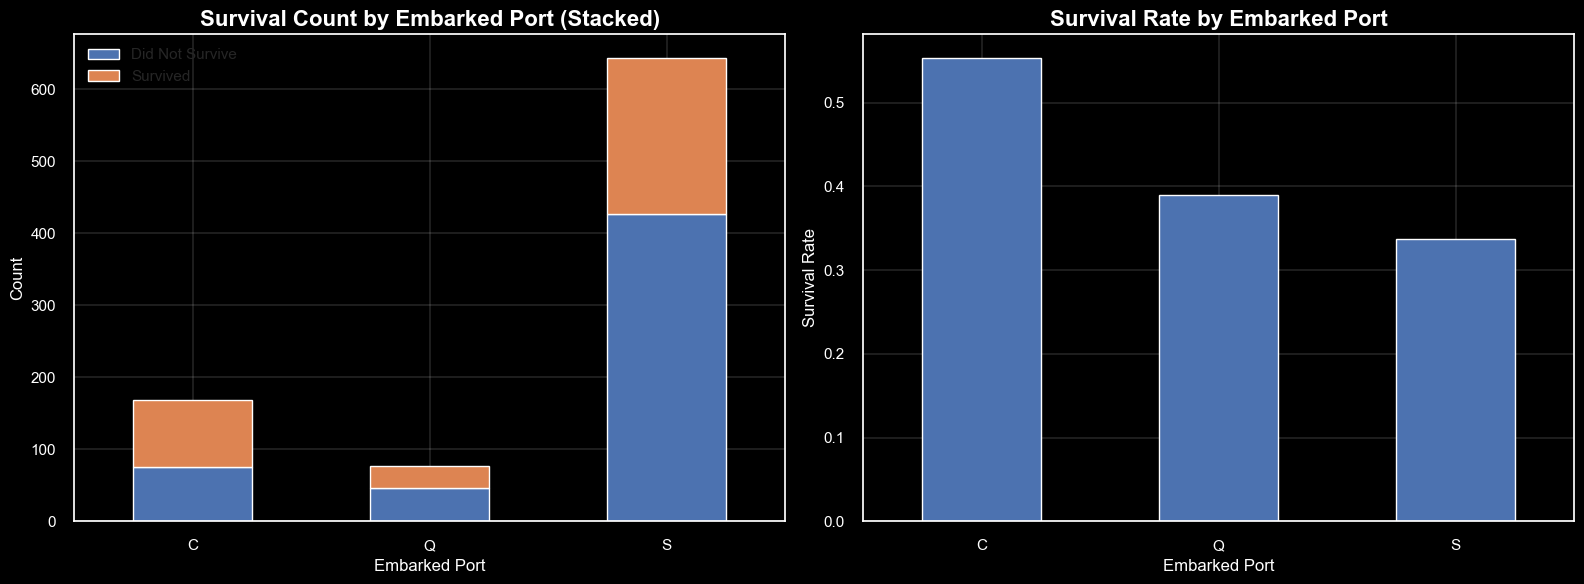

In [199]:
# Visualizations for Survived vs Embarked
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Stacked bar plot
survival_counts_embarked = df.groupby(['Embarked', 'Survived']).size().unstack()
survival_counts_embarked.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Survival Count by Embarked Port (Stacked)')
axes[0].set_xlabel('Embarked Port')
axes[0].set_ylabel('Count')
axes[0].legend(['Did Not Survive', 'Survived'])
axes[0].tick_params(axis='x', rotation=0)

# Survival rate bar plot
survival_rate_embarked = df.groupby('Embarked')['Survived'].mean()
survival_rate_embarked.plot(kind='bar', ax=axes[1])
axes[1].set_title('Survival Rate by Embarked Port')
axes[1].set_xlabel('Embarked Port')
axes[1].set_ylabel('Survival Rate')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


**Interpretation - Survived vs Embarked:**

- **Port C (Cherbourg)** passengers had the highest survival rate (~55%), significantly above average.
- **Port Q (Queenstown)** passengers had moderate survival rate (~39%), close to the overall average.
- **Port S (Southampton)** passengers had the lowest survival rate (~34%), below the overall average.
- The difference in survival rates might be **correlated with passenger class**, as we saw earlier that Port C had higher fares.
- **Southampton** had the most passengers but also the most casualties, possibly due to having more 3rd class passengers.
- **Cherbourg** passengers' higher survival rate aligns with their higher average fares, suggesting better cabin locations and class privileges.

In [200]:
### 5. Survived vs SibSp (Categorical vs Categorical)

# Descriptive Statistics
print("Survival Rate by Number of Siblings/Spouses:")
print("=" * 42)
survival_by_sibsp = df.groupby('SibSp')['Survived'].agg(['count', 'sum', 'mean'])
survival_by_sibsp.columns = ['Total_Passengers', 'Survivors', 'Survival_Rate']
print(survival_by_sibsp)

print("\n\nCrosstab - Survived vs SibSp:")
print("-" * 30)
crosstab_survived_sibsp = pd.crosstab(df['SibSp'], df['Survived'], margins=True)
print(crosstab_survived_sibsp)


Survival Rate by Number of Siblings/Spouses:
       Total_Passengers  Survivors  Survival_Rate
SibSp                                            
0                   608        210       0.345395
1                   209        112       0.535885
2                    28         13       0.464286
3                    16          4       0.250000
4                    18          3       0.166667
5                     5          0       0.000000
8                     7          0       0.000000


Crosstab - Survived vs SibSp:
------------------------------
Survived    0    1  All
SibSp                  
0         398  210  608
1          97  112  209
2          15   13   28
3          12    4   16
4          15    3   18
5           5    0    5
8           7    0    7
All       549  342  891


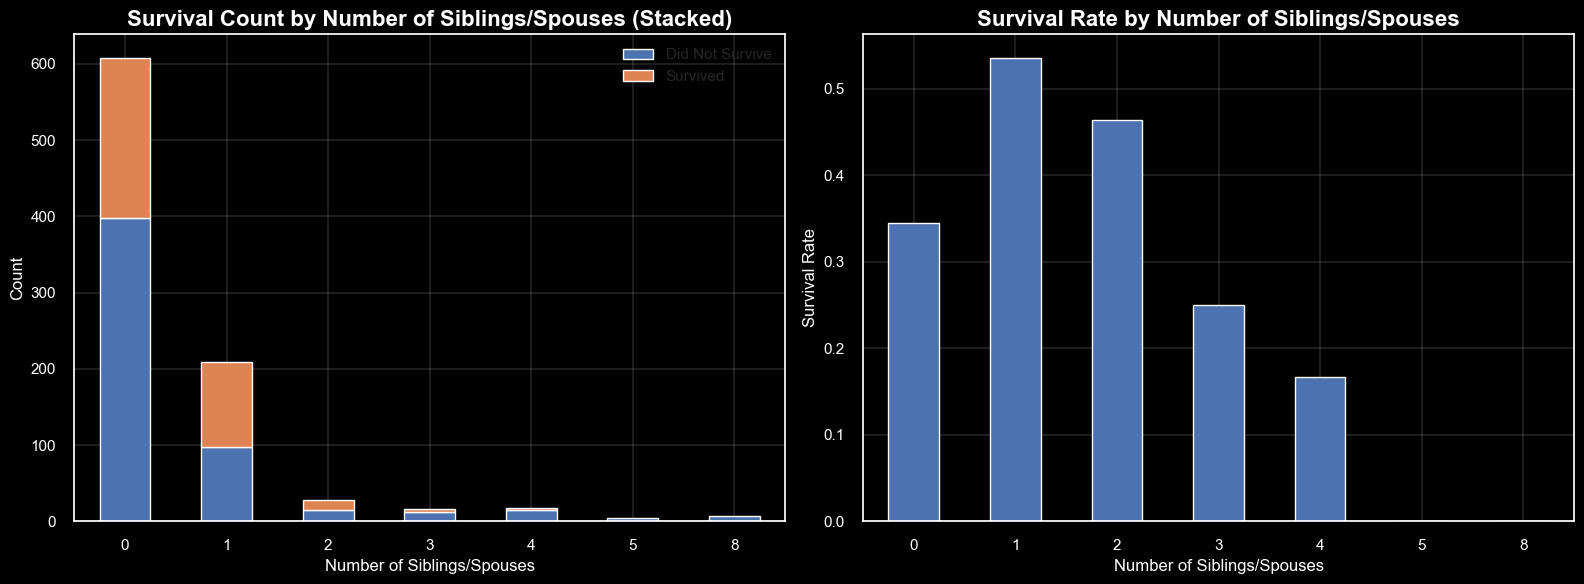

In [201]:
# Visualizations for Survived vs SibSp
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Stacked bar plot
survival_counts_sibsp = df.groupby(['SibSp', 'Survived']).size().unstack()
survival_counts_sibsp.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Survival Count by Number of Siblings/Spouses (Stacked)')
axes[0].set_xlabel('Number of Siblings/Spouses')
axes[0].set_ylabel('Count')
axes[0].legend(['Did Not Survive', 'Survived'])
axes[0].tick_params(axis='x', rotation=0)

# Survival rate bar plot
survival_rate_sibsp = df.groupby('SibSp')['Survived'].mean()
survival_rate_sibsp.plot(kind='bar', ax=axes[1])
axes[1].set_title('Survival Rate by Number of Siblings/Spouses')
axes[1].set_xlabel('Number of Siblings/Spouses')
axes[1].set_ylabel('Survival Rate')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


**Interpretation - Survived vs SibSp:**

- **Passengers traveling alone** (SibSp = 0) had a moderate survival rate (~34.5%), representing the largest group.
- **Passengers with 1 sibling/spouse** had the highest survival rate (~53.6%), suggesting small family groups helped survival.
- **Passengers with 2 siblings/spouses** maintained a good survival rate (~46.4%).
- **Survival rates decreased dramatically** for passengers with 3+ siblings/spouses, dropping to very low rates.
- **Large family groups** (SibSp ≥ 4) had extremely poor survival rates, possibly due to:
  - Difficulty coordinating evacuation with many family members
  - Lower socioeconomic status (larger families in steerage)
  - Challenges in finding space for entire large families in lifeboats
- This suggests **small family support** was beneficial, but **large family obligations** became a survival hindrance.


# Part - 4

## Identifying Data Issues

- Throughout your analysis, identify any potential data issues:
    
    - Outliers: Are there extreme values in continuous variables?

    - Missing Values: Which columns have missing data? How might this affect analysis?

    - Non-Normality: Are there signs of skewness or abnormal kurtosis in the distributions of continuous variables?

- Provide a brief summary of the issues you identified and discuss how they could affect any further analysis or modeling.

## Data Issues Identified

### Outliers
- **Fare:** There are some very high fare values (above 500) which are much higher than most other fares.

### Missing Values
- **Age:** About 20% of age values are missing.
- **Cabin:** Most cabin values are missing.
- **Embarked:** Only a couple are missing, but it’s still incomplete.
- *Missing data can make analysis or training models less accurate, especially if the missing values are not random.*

### Non-Normality (Skewness)
- **Fare:** Strong right-skew (most fares are low, a few are very high).
- **Age:** Right-skewed (more young people than old).
- **SibSp and Parch:** Most people traveled alone or with only one or two relatives—these are also right-skewed.


---


## How These Issues Affect Analysis

- **Outliers** can make averages misleading and affect models that are sensitive to them.
- **Missing values** can reduce accuracy or bias results if not handled (filling them, removing those rows, or careful imputation is needed).
- **Skewed data** (non-normality) means some statistical methods (that expect normal distribution) may not work well.